In [ ]:
#Project guided by Chanin Nantasenamat's bioinformatic course: https://github.com/dataprofessor/bioinformatics_freecodecamp/blob/main/CDD_ML_Part_1_Acetylcholinesterase_Bioactivity_Data_Concised.ipynb

In [1]:
# Install ChEMBL Database Client
! pip install chembl_webresource_client

In [2]:
# Importing Libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

In [ ]:
# Search for HIV in ChEMBL
target = new_client.target
target_virus = target.search('HIV')
target_virus_df = pd.DataFrame.from_dict(target_virus)
target_virus_df

In [ ]:
# Filter and retrieve data for target protein
target_protein = target_virus_df.target_chembl_id[4]
target_protein

In [ ]:
# Obtain bioactivity data
activity = new_client.activity
inhib_conc = activity.filter(target_chembl_id = target_protein).filter(standard_type = 'IC50')
# IC50 is The half maximal inhibitory concentration is a measure of the potency of a 
# substance in inhibiting a specific biological or biochemical function. Measured in micromolar (mM)

In [ ]:
df1 = pd.DataFrame.from_dict(inhib_conc)
df1

In [ ]:
# Save and export selected data to Excel
df1.to_csv('HIV_Bioactivity_dataset.csv', index = False)

In [ ]:
import shutil
shutil.move('HIV_Bioactivity_dataset.csv', '/Users/larry-gyden/Documents/Bioinformatics')

In [ ]:
# Clean data and remove objects missing standard type values
df2 = df1[df1.standard_value.notna()]
df2 = df1[df1.canonical_smiles.notna()]
df2

In [ ]:
# Remove therapeutic compounds with duplicate chemical structures
df2 = df2.drop_duplicates(['canonical_smiles'])
df2

In [ ]:
# Generate new data frame for the therapeutic drug molecules
df3 = df2[['molecule_chembl_id', 'canonical_smiles', 'standard_value']]
df3

In [ ]:
#Save and export processed data to Excel
import shutil
df3.to_csv('HIV_Bioactivity_dataset.csv', index = False)
shutil.move('HIV_Bioactivity_dataset.csv', '/Users/larry-gyden/Documents/Bioinformatics')

In [3]:
# Reimport data from Excel
df4 = pd.read_csv('/Users/larry-gyden/Documents/Bioinformatics/HIV_Bioactivity_dataset.csv')

In [4]:
# Label therapeutic drug compounds based on inhibitory concentration (IC50)
bioactivity_threshold = []
for i in df4.standard_value:
      if float(i) >= 10000:
        bioactivity_threshold.append("Inactive")
      elif float(i) <= 1000:
        bioactivity_threshold.append("Active")
      else:
        bioactivity_threshold.append("Intermediate")

In [5]:
# Concatenate bioactivity class to dataframe
bioactivity_class = pd.Series(bioactivity_threshold, name = 'Bioactivity Class')
df5 = pd.concat([df4, bioactivity_class], axis = 1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity Class
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.00,Active
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.00,Active
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.00,Active
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.00,Active
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.00,Active
...,...,...,...,...
2942,CHEMBL4748891,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,126.00,Active
2943,CHEMBL4797451,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,2413.00,Intermediate
2944,CHEMBL4760108,O=C(O)c1ccc(Oc2ccc(Cl)cc2NS(=O)(=O)c2ccc(Cl)c(...,3981.07,Intermediate
2945,CHEMBL4783861,N#CSCCNC(=O)c1ccc(Oc2ccc(Cl)cc2NS(=O)(=O)c2ccc...,3981.07,Intermediate


In [ ]:
#Save and export processed data to Excel
import shutil
df5.to_csv('HIV_Bioactivity_processed_dataset.csv', index = False)
shutil.move('HIV_Bioactivity_processed_dataset.csv', '/Users/larry-gyden/Documents/Bioinformatics')

In [6]:
# Install rdkit
! pip install rdkit

In [7]:
# Import Libraries
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
## Lipinski Descriptors
# Evaluates the drug likeness of compounds based on Absorbption, Distribution, Metabolism, and Excretion (ADME)
# RULES:
# Molecular Weight < 500 Dalton
# Octaol-water partition coefficient (LogP) < 5
# Hydrogen bond donors < 5
# Hydrogen bond acceptors < 10

In [8]:
# Lipinski Descriptors Function
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [9]:
# Calculate Lipinski Descriptors for HIV processed data
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,595.704,5.71140,0.0,9.0
1,518.618,4.64940,0.0,8.0
2,581.717,6.58170,0.0,7.0
3,557.181,5.28940,0.0,4.0
4,567.690,6.40760,0.0,7.0
...,...,...,...,...
2942,1197.480,6.56022,7.0,15.0
2943,1169.426,5.78002,7.0,15.0
2944,472.733,5.93810,2.0,4.0
2945,590.432,6.54938,2.0,6.0


In [10]:
# Concatenate Lipinski Descriptors and HIV processed data
df6 = pd.concat([df5, df_lipinski], axis = 1)
df6

,molecule_chembl_id,canonical_smiles,standard_value,Bioactivity Class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,335.00,Active,595.704,5.71140,0.0,9.0
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,28.00,Active,518.618,4.64940,0.0,8.0
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,10.00,Active,581.717,6.58170,0.0,7.0
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,35.00,Active,557.181,5.28940,0.0,4.0
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,15.00,Active,567.690,6.40760,0.0,7.0
...,...,...,...,...,...,...,...,...
2942,CHEMBL4748891,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,126.00,Active,1197.480,6.56022,7.0,15.0
2943,CHEMBL4797451,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,2413.00,Intermediate,1169.426,5.78002,7.0,15.0
2944,CHEMBL4760108,O=C(O)c1ccc(Oc2ccc(Cl)cc2NS(=O)(=O)c2ccc(Cl)c(...,3981.07,Intermediate,472.733,5.93810,2.0,4.0
2945,CHEMBL4783861,N#CSCCNC(=O)c1ccc(Oc2ccc(Cl)cc2NS(=O)(=O)c2ccc...,3981.07,Intermediate,590.432,6.54938,2.0,6.0


In [11]:
# Convert the uniformly distributed IC50 to a negative logorithmic scale (pIC50)
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [12]:
# Cap all returned values to 100,000,000 to prevent pIC50 from becoming negative
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
              i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [13]:
# Calculate pIC50 after capping standard_value (IC50 inhibitory concentration)
df_final = pIC50(norm_value(df6))

/var/folders/rs/s7lqpd713n9bgh84nh6vlyrr0000gn/T/ipykernel_50491/1651603075.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value', 1)
/var/folders/rs/s7lqpd713n9bgh84nh6vlyrr0000gn/T/ipykernel_50491/22618192.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x = input.drop('standard_value_norm', 1)


In [14]:
#Remove the intermediate bioactivity class of therapeutic compounds for a simpler bivariate comparison
df_bivar = df_final[df_final['Bioactivity Class'] != 'Intermediate']
df_bivar

,molecule_chembl_id,canonical_smiles,Bioactivity Class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL105460,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Active,595.704,5.71140,0.0,9.0,6.474955
1,CHEMBL105606,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Active,518.618,4.64940,0.0,8.0,7.552842
2,CHEMBL105570,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Active,581.717,6.58170,0.0,7.0,8.000000
3,CHEMBL83338,CN(C[C@@H](CCN1CCC2(CC1)C[S+]([O-])c1ccccc12)c...,Active,557.181,5.28940,0.0,4.0,7.455932
4,CHEMBL325357,C=CCN(C(=O)OCc1ccc([N+](=O)[O-])cc1)C1CCN(CCC(...,Active,567.690,6.40760,0.0,7.0,7.823909
...,...,...,...,...,...,...,...,...
2938,CHEMBL4795179,CNC(=O)COCC(=O)NCCCCCCCNC(=O)COCC(=O)Nc1ccc([C...,Active,886.099,4.85152,5.0,11.0,6.206210
2939,CHEMBL4800480,CNC(=O)COCC(=O)NCCCCCNC(=O)COCC(=O)Nc1ccc([C@H...,Active,858.045,4.07132,5.0,11.0,6.023192
2941,CHEMBL4761986,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,Active,1225.534,7.34042,7.0,15.0,6.265200
2942,CHEMBL4748891,Cc1nnc(C(C)C)n1[C@@H]1C[C@@H]2CC[C@H](C1)N2CC[...,Active,1197.480,6.56022,7.0,15.0,6.899629


In [ ]:
# Save and export processed data to Excel
import shutil
df_bivar.to_csv('Final_HIV_Bioactivity_processed_dataset.csv', index = False)
shutil.move('Final_HIV_Bioactivity_processed_dataset.csv', '/Users/larry-gyden/Documents/Bioinformatics')

In [15]:
# Import libraries for exploratory data analysis of chemical space
import seaborn as sns
sns.set(style = 'ticks')
import matplotlib.pyplot as plt

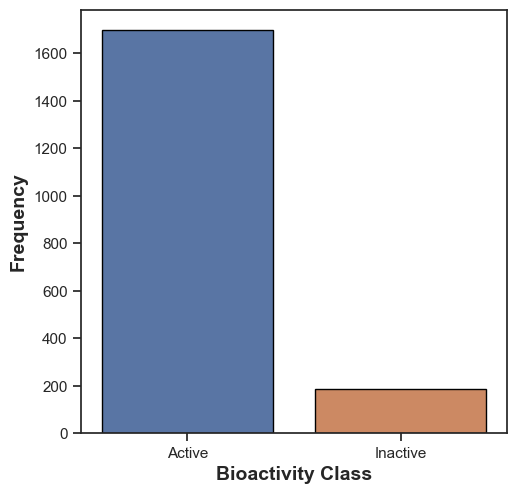

In [16]:
# Bar plot
plt.figure(figsize = (5.5, 5.5))

sns.countplot(x = 'Bioactivity Class', data = df_bivar, edgecolor = 'black')

plt.xlabel('Bioactivity Class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 14, fontweight = 'bold')

plt.show()

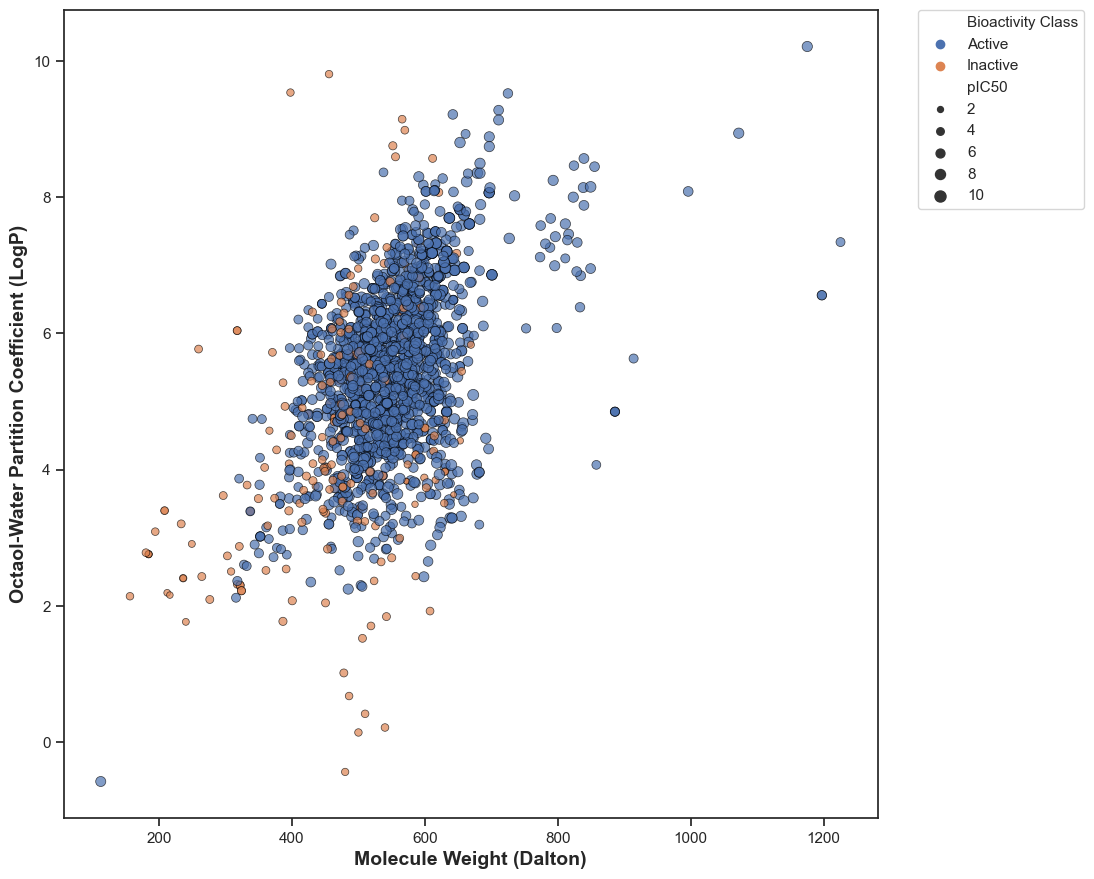

In [17]:
# Scatter plot
plt.figure(figsize = (10.5, 10.5))

sns.scatterplot(x = 'MW', y = 'LogP', data = df_bivar, 
                hue = 'Bioactivity Class', size ='pIC50', edgecolor ='black', alpha = 0.7)

plt.xlabel('Molecule Weight (Dalton)', fontsize = 14, fontweight = 'bold')
plt.ylabel('Octaol-Water Partition Coefficient (LogP)', fontsize = 14, fontweight = 'bold')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0)
plt.show()

In [18]:
# Mann Whitney can be used to determine if the distributions of the two bioactivity classes
# are the same for each variable (null hypothesis: H0)
def mannwhitney(descriptor, verbose=False):
  # Adapted from: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'Bioactivity Class']
  df = df_bivar[selection]
  active = df[df['Bioactivity Class'] == 'Active']
  active = active[descriptor]

  selection = [descriptor, 'Bioactivity Class']
  df = df_bivar[selection]
  inactive = df[df['Bioactivity Class'] == 'Inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

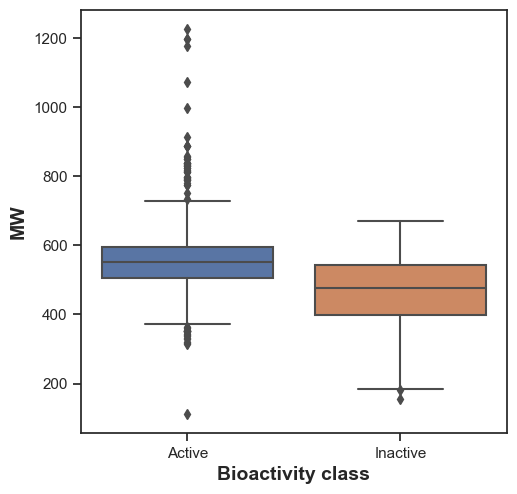

In [21]:
# Box-and-Whisker plots and Mann Whitney tests for each variable
# pIC50
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'Bioactivity Class', y = 'MW', data = df_bivar)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('MW', fontsize = 14, fontweight = 'bold')

plt.show()

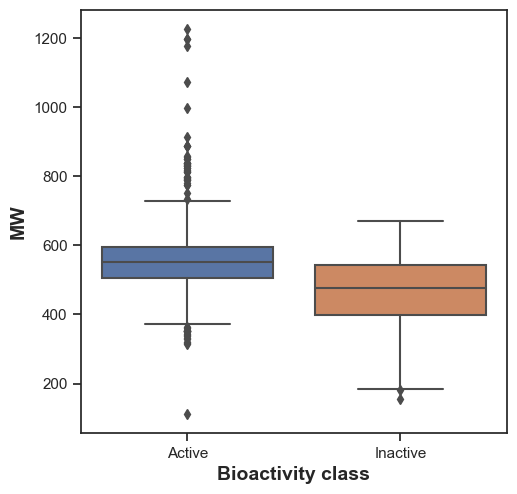

In [22]:
# Molecule Weight
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'Bioactivity Class', y = 'MW', data = df_bivar)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('MW', fontsize = 14, fontweight = 'bold')

plt.show()

In [ ]:
# Octaol-Water Partition Coefficient (LogP)
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'Bioactivity Class', y = 'LogP', data = df_bivar)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Octaol-Water Partition Coefficient (LogP)', fontsize = 14, fontweight = 'bold')

plt.show()

In [ ]:
#Number of Hydrogen Bond Donors
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'Bioactivity Class', y = 'NumHDonors', data = df_bivar)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Number of Hydrogen Bond Donors', fontsize = 14, fontweight = 'bold')

plt.show()
mannwhitney('NumHDonors')

In [ ]:
#Number of Hydrogen Bond Acceptors
plt.figure(figsize = (5.5, 5.5))

sns.boxplot(x = 'Bioactivity Class', y = 'NumHAcceptors', data = df_bivar)

plt.xlabel('Bioactivity class', fontsize = 14, fontweight = 'bold')
plt.ylabel('Number of Hydrogen Bond Acceptors', fontsize = 14, fontweight = 'bold')

plt.show()
mannwhitney('NumHAcceptors')

## Statstical Interpretation
#### All of the Lipinski's descriptors Absorbption, Distribution, Metabolism, and Excretion (ADME) exhibited statistically significant difference between the Active bioactivity class and Inactive bioactivity class.

In [ ]:
# Install PaDEL-Descriptor
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

In [ ]:
! brew help

In [ ]:
# Isolate data for descriptor calculation
df_descrip = df6['canonical_smiles']
df_descrip

In [ ]:
# save to CSV 
import shutil
df_descrip.to_csv('Molecule_Descriptors.csv', sep = '\t', index = False, header = False)
shutil.move('Molecule_Descriptors.csv', '/Users/larry-gyden/Documents/Bioinformatics')

In [ ]:
# Test bash terminal
! cat Molecule_Descriptors.smi | head

In [ ]:
! cat Molecule_Descriptors.smi | wc -l

In [ ]:
#Calculate fingerprint descriptor (purest compound) usign PaDEL (removes sodiums, clorides, small organic acids)
! bash Molecule_Descriptors.smi padel.sh